In [9]:
with open('ise_processed.txt', 'r') as f:
    a = f.read()
b = a.split('\n')

In [23]:
from operator import methodcaller
c = list(map(methodcaller("split", "---"), b))

In [2]:
import pandas as pd
# df = pd.DataFrame(c, columns=['num', 'emotion', 'sen'])

In [87]:
df.iloc[:,0] = range(0,7665)

In [94]:
import numpy as np
np.savetxt('sen.txt', df['sen'], fmt='%s')

In [97]:
sum(df['sen'] == '[ No response.]')

77

In [102]:
with open('sen.en.fa.txt', 'r') as fa:
    txt = fa.read()
df['fa'] = txt.split('\n')[0:-1]

In [104]:
df = df.loc[df["sen"] != '[ No response.]']

In [107]:
np.savetxt('persian.txt', df.values, fmt='%s')

In [115]:
df.to_excel('persian.xlsx')
df.to_pickle('persian.pkl')

In [112]:
from googletrans import Translator
tr = Translator()
ans = tr.translate(c[0][2], dest='fa')

In [1]:
import pandas as pd
df = pd.read_pickle('persian.pkl')

In [2]:
from hazm import *
stops = stopwords_list() + ['[', ']', '"', "'", '«', '»', '{', '}', '.', '،', '\u200c']
normalizer = Normalizer()
t = list(map(normalizer.normalize, df['fa']))
t = list(map(word_tokenize, t))
t = [[i for i in j if i not in stops] for j in t]
t = list(map(' '.join, t))

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(t).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, df['emotion'], test_size=0.2, random_state=0)


svm_model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto') # Linear Kernel
svm_model.fit(x_train, y_train)
print(svm_model.n_support_)

y_pred = svm_model.predict(x_test)
print(f'accuracy for svm: {accuracy_score(y_pred, y_test)*100} %')
print(classification_report(y_test, y_pred))

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split

tfidfvectorizer = TfidfVectorizer()

tfidf_wm = tfidfvectorizer.fit_transform(t)
tfidf_tokens = tfidfvectorizer.get_feature_names()
X = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)

x_train, x_test, y_train, y_test = train_test_split(X, df['emotion'], test_size=0.2, random_state=0)

svm_model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto') # Linear Kernel
svm_model.fit(x_train, y_train)
print(svm_model.n_support_)

y_pred = svm_model.predict(x_test)
print(f'accuracy for svm: {accuracy_score(y_pred, y_test)*100} %')
print(classification_report(y_test, y_pred))

[837 795 707 791 721 691 804]
accuracy for svm: 55.20421607378129 %
              precision    recall  f1-score   support

       anger       0.41      0.49      0.44       212
     disgust       0.51      0.55      0.53       220
        fear       0.68      0.62      0.65       227
       guilt       0.50      0.46      0.48       224
         joy       0.64      0.73      0.69       211
     sadness       0.67      0.54      0.60       208
       shame       0.49      0.49      0.49       216

    accuracy                           0.55      1518
   macro avg       0.56      0.55      0.55      1518
weighted avg       0.56      0.55      0.55      1518



In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

tfidfvectorizer = TfidfVectorizer()

tfidf_wm = tfidfvectorizer.fit_transform(t)
tfidf_tokens = tfidfvectorizer.get_feature_names()
X = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)

x_train, x_test, y_train, y_test = train_test_split(X, df['emotion'], test_size=0.2, random_state=0)

gnb = MultinomialNB()
naviebayse_model = gnb.fit(x_train, y_train)
y_pred = naviebayse_model.predict(x_test)
print(f'accuracy for naviebayse: {accuracy_score(y_pred, y_test)*100} %')
print(classification_report(y_test, y_pred))

accuracy for naviebayse: 55.072463768115945 %
              precision    recall  f1-score   support

       anger       0.43      0.45      0.44       212
     disgust       0.62      0.48      0.54       220
        fear       0.60      0.63      0.62       227
       guilt       0.51      0.53      0.52       224
         joy       0.59      0.76      0.67       211
     sadness       0.58      0.53      0.56       208
       shame       0.53      0.47      0.50       216

    accuracy                           0.55      1518
   macro avg       0.55      0.55      0.55      1518
weighted avg       0.55      0.55      0.55      1518



In [35]:
t = classification_report(y_test, y_pred).split()[4:-15]

In [36]:
e = [t[i] for i in range(len(t)) if i % 5 == 0]
p = [float(t[i]) for i in range(len(t)) if i % 5 == 1]
r = [float(t[i]) for i in range(len(t)) if i % 5 == 2]
f1 = [float(t[i]) for i in range(len(t)) if i % 5 == 3]

In [37]:
p = [p[-1], p[3], p[1], p[2], p[-2], p[-3], p[0]]
e = [e[-1], e[3], e[1], e[2], e[-2], e[-3], e[0]]
r = [r[-1], r[3], r[1], r[2], r[-2], r[-3], r[0]]
f1 = [f1[-1], f1[3], f1[1], f1[2], f1[-2], f1[-3], f1[0]]

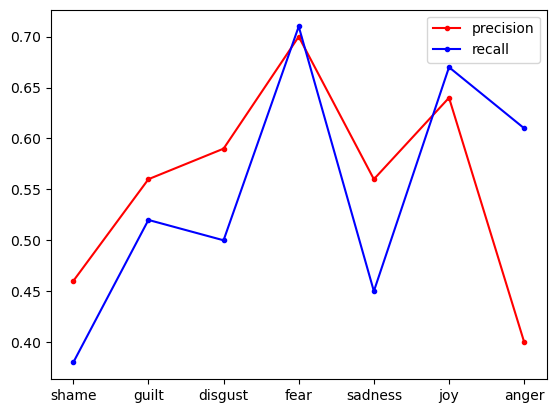

In [38]:
import matplotlib.pyplot as plt

plt.plot(e, p, '.-r')
plt.plot(e, r, '.-b')
# plt.plot(e, f1, '.-g')
plt.legend(['precision', 'recall', 'f1'])
plt.show()